# Введение в нейронные сети

## Эпизод 1: Персептрон

Дмитрий Сошников

технологический евангелист, Microsoft

dmitryso@microsoft.com

Данная презентация представляет собой введение в нейронные сети. Идея однодневного мастер-класса основана на Neural Network Workshop в Microsoft Research Cambridge. Материал и фрагменты кода частично взяты из презентаций [Katja Hoffmann](https://www.microsoft.com/en-us/research/people/kahofman/), [Matthew Johnson](https://www.microsoft.com/en-us/research/people/matjoh/) и [Ryoto Tomioka](https://www.microsoft.com/en-us/research/people/ryoto/) из Microsoft Research Cambridge. [NeuroWorkshop](http://github.com/shwars/NeuroWorkshop) подготовлен [Дмитрием Сошниковым](http://blog.soshnikov.com), Microsoft Russia.

## Два взгляда на нейронные сети

 * Восходящий подход к искусственному интеллекту
 * Способ усложнения и комбинирования базовых алгоритмов машинного обучения
     - обучение с учителем (*supervised learning*)
     - обучение без учителя (*unsupervised learning*)

## Обучение с учителем

**Дано:**
  * Обучающая выборка $\mathbf{X} \in \mathbb{R}^{n \times k}$
    * $n$ - размер выборки
    * $x_i$ представлено вектором свойств размерности $k$
  * Известные значения целевой функции $\mathbf{Y}$ ($y_i$ соответствует вектору свойств $x_i$)
    * $\mathbf{Y} \in \mathbb{R}^{n \times 1}$ (задачи регрессии)
    * $\mathbf{Y} \in C^{n \times 1}$, где $y_i \in C$ (задачи классификации на $|C|$ классов)


## Задача

**Дано:**
  * Обучающая выборка $\mathbf{X} \in \mathbb{R}^{n \times k}$
  * Входные значение целевой функции $\mathbf{Y}$

**Необходимо построить:**
  * Функцию $f : \mathbf{X} \rightarrow \mathbf{Y}$ который _точно предсказывает_ значение целевой функции на новом наборе входных данных $\mathbf{X}_{new}$


**[matplotlib.gridspec](https://matplotlib.org/stable/api/gridspec_api.html)** - содержит классы, которые помогают размещать несколько осей в виде сетки в пределах фигуры

**[sklearn (Scikit-learn)](https://scikit-learn.org/stable/)** - один из наиболее широко используемых пакетов **Python** для **Data Science** и **Machine Learning**. Он позволяет выполнять множество операций и предоставляет множество алгоритмов)

Установка **Scikit-learn**:
- `conda install -c anaconda scikit-learn`

Модуль **[sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)** включает в себя утилиты для загрузки наборов данных, включая методы для загрузки и получения популярных справочных наборов данных. Также есть несколько генераторов искусственных данных

**[sklearn.datasets.make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification)** модуль для создания случайных задач классификации n-классов

Модуль **[pickle](https://docs.python.org/3/library/pickle.html)** реализует двоичные протоколы для сериализации и десериализации структуры объекта **Python**

Mодуль **[random](https://docs.python.org/3/library/random.html)** реализует генераторы псевдослучайных чисел для различных распределений

In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.datasets import make_classification
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pickle
import os
import pylab

# инициализация генератора случайных чисел
np.random.seed(1)
import random

## Пример
Рассмотрим пример двухмерной задачи классификации на 2 класса. Примером такой задачи может быть классификация опухоли на 2 типа - доброкачественная и злокачественная, в зависимости от её размера и возраста.

In [2]:
# размер выборки
n = 50

# генерация задачи классификации:
# n_samples - количество объектов задачи классификаци
# n_features - общее количество признаков у объектов
# n_redundant - количество неинформативных (избыточных) признаков
# n_informative - количество информативных признаков)
# flip_y - количество объектов в долях (от 0 до 1), которым класс присвоен случайно
# X - сгенерированная выборка в виде массива признаков объектов
# Y - массив целых чисел - соответствие объекта к классу 
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0)
print(f'Признаки объектов:\n {X}')
print(f'Классы объектов:\n {Y}')

Признаки объектов:
 [[-1.74418375 -1.39520365]
 [ 2.59217839 -0.08124505]
 [ 0.9218062   0.91789982]
 [-0.84370177 -0.18738254]
 [-0.27501205 -1.26198287]
 [-1.06435515  1.49764711]
 [ 0.32839951  2.2567791 ]
 [-0.1901916   1.79802264]
 [-0.98535601 -1.19480331]
 [-1.49693229  0.79313349]
 [ 0.98437253  0.65941879]
 [-0.3333734   2.13972138]
 [-0.72858991  1.80336594]
 [-1.46642569 -0.76878457]
 [-0.22474062 -3.31057902]
 [-1.47727166 -1.11750497]
 [-0.48177962 -1.76754553]
 [ 0.69630232 -1.52963691]
 [-0.86454008 -1.24093389]
 [ 0.37357293 -0.75240233]
 [-0.44710832 -1.66666259]
 [-1.33199999  1.6348586 ]
 [ 0.99987818  0.12590546]
 [ 0.9846881   0.00422772]
 [ 0.92161104  1.37596239]
 [-0.55031643 -0.72141514]
 [ 0.59646789 -1.41568437]
 [-1.52972481  0.44521769]
 [ 0.25463996  2.07230053]
 [-0.08087816 -0.95385315]
 [-2.10454658 -1.41184986]
 [-2.14186893 -2.33161256]
 [-1.59985286 -2.3461304 ]
 [ 0.67125646  1.20133839]
 [ 0.59668612  2.00667388]
 [-2.827096   -0.72936336]
 [-1.103

In [3]:
# бинаризация (со знаком) ответов задачи классификации
Y = Y*2-1
print(f'Ответы задачи бинарной классификации:\n {Y}')

Ответы задачи бинарной классификации:
 [-1 -1  1 -1 -1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1
  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1  1
  1  1]


In [4]:
# типизация массивов данных
X = X.astype(np.float32); 
Y = Y.astype(np.int32)

print(f'Признаки объектов:\n {X}')
print(f'Ответы бинарной классификации:\n {Y}')

Признаки объектов:
 [[-1.7441838  -1.3952037 ]
 [ 2.5921783  -0.08124504]
 [ 0.9218062   0.91789985]
 [-0.8437018  -0.18738253]
 [-0.27501205 -1.2619829 ]
 [-1.0643551   1.4976472 ]
 [ 0.3283995   2.2567792 ]
 [-0.1901916   1.7980226 ]
 [-0.98535603 -1.1948034 ]
 [-1.4969323   0.7931335 ]
 [ 0.98437256  0.65941876]
 [-0.3333734   2.1397214 ]
 [-0.7285899   1.803366  ]
 [-1.4664257  -0.7687846 ]
 [-0.22474062 -3.310579  ]
 [-1.4772717  -1.117505  ]
 [-0.48177963 -1.7675456 ]
 [ 0.6963023  -1.5296369 ]
 [-0.8645401  -1.2409339 ]
 [ 0.37357292 -0.7524023 ]
 [-0.44710833 -1.6666626 ]
 [-1.332       1.6348586 ]
 [ 0.99987817  0.12590547]
 [ 0.9846881   0.00422772]
 [ 0.921611    1.3759624 ]
 [-0.55031645 -0.72141516]
 [ 0.5964679  -1.4156843 ]
 [-1.5297248   0.4452177 ]
 [ 0.25463995  2.0723004 ]
 [-0.08087816 -0.95385313]
 [-2.1045465  -1.4118499 ]
 [-2.1418688  -2.3316126 ]
 [-1.5998529  -2.3461304 ]
 [ 0.6712565   1.2013384 ]
 [ 0.5966861   2.0066738 ]
 [-2.827096   -0.7293634 ]
 [-1.103

In [5]:
# Разбиваем на обучающую и тестовые выборки. В реальной жизни обучающая - 80% данных
train_x, test_x = np.split(X, [ n*8//10])
train_labels, test_labels = np.split(Y, [n*8//10])
print(f'Обучающая выборка объектов:\n {train_x}')
print(f'Обучающая выборка ответов:\n {train_labels}')
print(f'Тестовая выборка объектов:\n {test_x}')
print(f'Тестовая выборка ответов:\n {test_labels}')

Обучающая выборка объектов:
 [[-1.7441838  -1.3952037 ]
 [ 2.5921783  -0.08124504]
 [ 0.9218062   0.91789985]
 [-0.8437018  -0.18738253]
 [-0.27501205 -1.2619829 ]
 [-1.0643551   1.4976472 ]
 [ 0.3283995   2.2567792 ]
 [-0.1901916   1.7980226 ]
 [-0.98535603 -1.1948034 ]
 [-1.4969323   0.7931335 ]
 [ 0.98437256  0.65941876]
 [-0.3333734   2.1397214 ]
 [-0.7285899   1.803366  ]
 [-1.4664257  -0.7687846 ]
 [-0.22474062 -3.310579  ]
 [-1.4772717  -1.117505  ]
 [-0.48177963 -1.7675456 ]
 [ 0.6963023  -1.5296369 ]
 [-0.8645401  -1.2409339 ]
 [ 0.37357292 -0.7524023 ]
 [-0.44710833 -1.6666626 ]
 [-1.332       1.6348586 ]
 [ 0.99987817  0.12590547]
 [ 0.9846881   0.00422772]
 [ 0.921611    1.3759624 ]
 [-0.55031645 -0.72141516]
 [ 0.5964679  -1.4156843 ]
 [-1.5297248   0.4452177 ]
 [ 0.25463995  2.0723004 ]
 [-0.08087816 -0.95385313]
 [-2.1045465  -1.4118499 ]
 [-2.1418688  -2.3316126 ]
 [-1.5998529  -2.3461304 ]
 [ 0.6712565   1.2013384 ]
 [ 0.5966861   2.0066738 ]
 [-2.827096   -0.7293634 ]

**[matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplots)** - создание фигуры и набора осей для графиков 

**[matplotlib.pyplot.suptitle](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html?highlight=suptitle#matplotlib.pyplot.suptitle)** - добавление заголовка к фигуре по центру

**[matplotlib.axes.Axes.set_xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html?highlight=set_xlabel#matplotlib.axes.Axes.set_xlabel)** - установление метки (название) для оси X

**[matplotlib.axes.Axes.set_ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html?highlight=set_ylabel#matplotlib.axes.Axes.set_ylabel)** - установление метки (названия) для оси Y

**[matplotlib.axes.Axes.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html?highlight=scatter#matplotlib.axes.Axes.scatter)** - диаграмма разброса **y** по **x** с разным размером и/или цветом маркера

**[matplotlib.pyplot.subplots_adjust](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html?highlight=subplots_adjust#matplotlib.pyplot.subplots_adjust)** - настройте параметры компоновки подзаголовка

In [6]:
# функция вывода графика разброса объектов по классам
# suptitle - название фигуры
# features - признаки объектов
# labels - метки (названия) осей
def plot_dataset(suptitle, features, labels):
    # подготовка графиков
    fig, ax = plt.subplots(1, 1)
    #plt.subplots_adjust(bottom=0.2, wspace=0.4)
    fig.suptitle(suptitle, fontsize = 16)
    
    # установление меток по осям осям
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')

    # установление цвета для различных классов 
    colors = ['r' if l>0 else 'b' for l in labels]
    
    # построение графика
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    
    # вывод фигуры
    fig

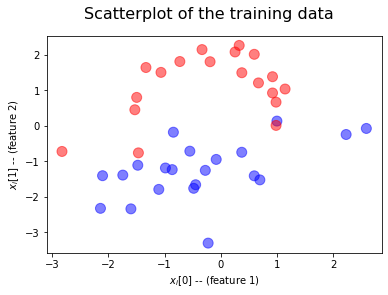

In [7]:
# вывод графика функции разброса объектов по классам
plot_dataset('Scatterplot of the training data', train_x, train_labels)

## Нейросети
<img src="https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/images/synapse-wikipedia.JPG" width="30%"/>
Искусственная нейросеть - это моделирование с той или иной точностью процессов, происходящих в мозге человека.
  * Моделируется в основном электрическая активность
  * Сильное упрощение модели, которое позволяет эффективно её вычислять



## Персептрон
<img style='margin: 10px;width: 30%;' src='https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/images/Rosenblatt-wikipedia.jpg' alt='Frank Rosenblatt' align='right'/>
Первая попытка реализовать нейронную сеть - 1957 г., Cornell Aeronautical Laboratory, Frank Rosenblatt. 

Реализация "в железе"

Цель - распознавание образов

Один нейрон, 400 входов от изображения 20x20, двоичный выход

## Персептрон

<img style='margin: 10px;width:30%' src='https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/images/Mark_I_perceptron_wikipedia.jpg' align='right' alt='The Mark 1 Perceptron' />

New York Times так об этом писала:

> the embryo of an electronic computer that [the Navy] expects will be able to walk, talk,
> see, write, reproduce itself and be conscious of its existence.

В основе - работы Warren McCullock и Walter Pitts 1943 года

Threshold Logic Unit - первая модель искусственного нейрона

## Мат.модель персептрона

На вход подаётся вектор $\mathbf{x}$, в этом случае выходное значение вычисляется как:

$$y(\mathbf{x}) = f(\mathbf{w}^{\mathrm{T}}\mathbf{x})$$

где $\mathbf{w}$ - вектор весов, $f$ - пороговая функция вида
$$
f(x) = \begin{cases}
         +1 & x \geq 0 \\
         -1 & x < 0
       \end{cases} \\
$$

## Алгоритм обучения

Для работы персептрона необходимо найти веса $\mathbf{w}$. Для этого мы используем и минимизируем **критерий персептрона**:

$$E(\mathbf{w}) = -\sum_{n \in \mathcal{M}}\mathbf{w}^{\mathrm{T}}\mathbf{x}_{n}t_{n}$$
 
  * $t_{n} \in \{-1, +1\}$ для отрицательных и положительных примеров соответственно
  * $\mathcal{M}$ - множество неправильно классифицированных примеров
  
Для обновления весов на каждом примере мы можем использовать градиент этой функции:

$$\mathbf{w}^{\tau + 1}=\mathbf{w}^{\tau} - \eta \nabla E(\mathbf{w}) = \mathbf{w}^{\tau} + \eta \mathbf{x}_{n} t_{n}$$

где $\eta$ - коэффициент, показывающий скорость обучения, $\tau\in\mathbb{N}$ - номер шага алгоритма

In [8]:
# получение массива объектов с позитивными выходами:
# [признаки объекта, 1 в качестве ответа]
pos_examples = np.array([ [t[0],t[1],1] for i,t in enumerate(train_x) 
                          if train_labels[i]>0])
print(f'Объекты обучающей выборки с положительными ответами:\n {pos_examples}')
print(f'Количество объектов с позитивными выходами: {len(pos_examples)}')

Объекты обучающей выборки с положительными ответами:
 [[ 0.92180622  0.91789985  1.        ]
 [-1.06435513  1.49764717  1.        ]
 [ 0.32839951  2.25677919  1.        ]
 [-0.1901916   1.79802263  1.        ]
 [-1.49693227  0.7931335   1.        ]
 [ 0.98437256  0.65941876  1.        ]
 [-0.3333734   2.13972139  1.        ]
 [-0.72858989  1.80336595  1.        ]
 [-1.46642566 -0.76878458  1.        ]
 [-1.33200002  1.63485861  1.        ]
 [ 0.9846881   0.00422772  1.        ]
 [ 0.92161101  1.37596238  1.        ]
 [-1.52972484  0.4452177   1.        ]
 [ 0.25463995  2.07230043  1.        ]
 [ 0.67125648  1.20133841  1.        ]
 [ 0.59668612  2.00667381  1.        ]
 [-2.82709599 -0.72936338  1.        ]
 [ 0.37516037  1.48782301  1.        ]
 [ 1.14530575  1.02912605  1.        ]]
Количество объектов с позитивными выходами: 19


In [9]:
# получение массива объектов с негативными выходами:
# [признаки объекта, -1 в качестве ответа]
neg_examples = np.array([ [t[0],t[1],1] for i,t in enumerate(train_x) 
                          if train_labels[i]<0])
print(f'Объекты обучающей выборки с положительными ответами:\n {neg_examples}')
print(f'Количество объектов с негативными выходами: {len(neg_examples)}')

Объекты обучающей выборки с положительными ответами:
 [[-1.74418378 -1.39520371  1.        ]
 [ 2.59217834 -0.08124504  1.        ]
 [-0.84370178 -0.18738253  1.        ]
 [-0.27501205 -1.26198292  1.        ]
 [-0.98535603 -1.19480336  1.        ]
 [-0.22474062 -3.31057906  1.        ]
 [-1.47727168 -1.11750495  1.        ]
 [-0.48177963 -1.76754558  1.        ]
 [ 0.69630229 -1.52963686  1.        ]
 [-0.8645401  -1.2409339   1.        ]
 [ 0.37357292 -0.75240231  1.        ]
 [-0.44710833 -1.66666257  1.        ]
 [ 0.99987817  0.12590547  1.        ]
 [-0.55031645 -0.72141516  1.        ]
 [ 0.59646791 -1.41568434  1.        ]
 [-0.08087816 -0.95385313  1.        ]
 [-2.10454655 -1.41184986  1.        ]
 [-2.14186883 -2.33161259  1.        ]
 [-1.59985292 -2.34613037  1.        ]
 [-1.10334003 -1.79789424  1.        ]
 [ 2.23235846 -0.2519221   1.        ]]
Количество объектов с негативными выходами: 21


**[numpy.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)** - скалярное произведение векторов

```python
# код не совсем правильный
# обучение модели
# positive_examples - обучающая выборка с положительными выходами
# negative_examples - обучающая выборка с отрицательными выходами
# num_iterations - количество итераций обучения
def train(positive_examples, negative_examples, num_iterations = 100):
    # начальная инициализация весов
    weights = [0,0,0]
    
    # цикл обечения по количеству итераций
    for i in range(num_iterations):
        # выбор случайного объекта из каждой выборки
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        # скалярное произведение векторов (вектор признаков объектов с положительными выходами на вектор весов)
        z = np.dot(pos, weights)   
        
        # увеличение весов на 1
        if z < 0:
            weights = weights + weights.shape
        
        # скалярное произведение векторов (вектор признаков объектов с отрицательными выходами на вектор весов)
        z  = np.dot(neg, weights)
        
        # уменьшение весов на 1
        if z >= 0:
            weights = weights - weights.shape

    # возвращаем веса
    return weights
```

**[numpy.zeros()](https://numpy.org/doc/stable/search.html?q=zeros)** - возвращает новый массив заданной формы и типа, заполненный нулями

**[numpy.zeros()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html?)** - возвращает cуммe элементов массива по заданной оси

In [10]:
# функция обучения модели
# positive_examples - обучающая выборка с положительными выходами
# negative_examples - обучающая выборка с отрицательными выходами
# num_iterations - количество итераций обучения модели
def train(positive_examples, negative_examples, num_iterations = 100):
    # определяем размерность (кол-во столбцов) матрицы [признаки объектов, ответ]
    num_dims = positive_examples.shape[1]
    
    # инициализируем вектор весов (вес каждого входа (признака), порог функции активации)
    weights = np.zeros((num_dims, 1))
    
    # получаем количество объектов из каждой выборки
    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    # частота вывода результатов (через сколько итераций выводить результат обучения модели)
    report_frequency = 10
    
    # цикл по количеству итераций
    for i in range(num_iterations):
        # случайным образом выбирается объект из каждой выборки
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        # скалярное произведение вектора "позитивного" объекта на вектор весов
        z = np.dot(pos, weights)
        
        # если "позитивный" объект определен как "негативный",
        # значит персептрон не возбудился, и нужно увеличить веса, 
        # которые участвовали в получении результата определения класса объекта 
        if z < 0:
            # Добавляем к весам значения принаков текущего "позитивного" объекта:
            # i-тый вес увеличивается на i-тый признак
            # последний вес увеличивается на ответ (т.е. +1)
            weights = weights + pos.reshape(weights.shape)

        # скалярное произведение вектора "негативного" объекта на вектор весов
        z  = np.dot(neg, weights)
        
        # если "негативный" объект определен как "позитивный", 
        # значит персептрон возбудился, и нужно уменьшить веса, 
        # которые участвовали в получении результата определения класса объекта 
        if z >= 0:
            # Вычитаем из весов значения принаков текущего "негативного" объекта:
            # i-тый вес уменьшается на i-тый признак
            # последний вес уменьшается на ответ (т.е. -1)
            weights = weights - neg.reshape(weights.shape)
            
        # если это итерация, при котором выводится результат
        if i % report_frequency == 0:             
            # результаты выходов: скалярное умножение матрицы обучающей выборки на вектор весов
            # определение классов объектов
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            
            # получение доли соответствия знака объектов в соответствующих выборках
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            
            # вывод:
            # Iteration - номер итерации
            # pos correct - точность определения позитивных объектов
            # neg correct - точность определения негативных объектов
            print("Iteration={0:0.2f}, pos correct={1:0.2f}, neg correct={2:0.2f}".format(i,pos_correct,neg_correct))

    # возращаем веса
    return weights

**[numpy.transpose()](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html)** - транспонирует (меняет оси в обратном порядке) или перемещает оси массива в указанные положения

In [11]:
# обучение модели и получение весов
wts = train(pos_examples,neg_examples)

print(f'Вывод весов:\n {wts}')
print(f'Вывод весов, после транспонирования матрицы:\n {wts.transpose()}')

Iteration=0.00, pos correct=0.63, neg correct=1.00
Iteration=10.00, pos correct=0.74, neg correct=1.00
Iteration=20.00, pos correct=0.89, neg correct=0.86
Iteration=30.00, pos correct=0.89, neg correct=1.00
Iteration=40.00, pos correct=0.89, neg correct=1.00
Iteration=50.00, pos correct=0.84, neg correct=1.00
Iteration=60.00, pos correct=0.89, neg correct=0.95
Iteration=70.00, pos correct=0.84, neg correct=1.00
Iteration=80.00, pos correct=0.84, neg correct=0.95
Iteration=90.00, pos correct=0.89, neg correct=0.95
Вывод весов:
 [[-0.58771984]
 [ 4.95571582]
 [ 1.        ]]
Вывод весов, после транспонирования матрицы:
 [[-0.58771984  4.95571582  1.        ]]


**[numpy.isclose()](https://numpy.org/doc/stable/reference/generated/numpy.isclose.html)** - возвращает логический массив, в котором два массива поэлементно равны в пределах допуска

**[matplotlib.pyplot.xlim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html)** - получение или установка пределов **x** текущих осей

**[matplotlib.pyplot.ylim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)** - получение или установка пределов **y** текущих осей

**[numpy.array()](https://numpy.org/doc/stable/reference/generated/numpy.array.html)** - создание массива

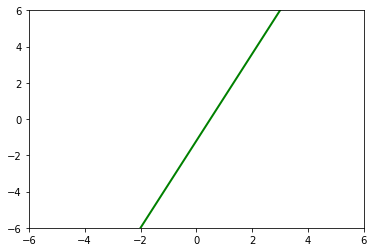

In [12]:
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.plot([-2, 3], [-6, 6], 'g', linewidth=2.0)

In [13]:
# функция вывода графика линейного классификатора
# positive_examples - выборка позитивных объектов
# negative_examples - выборка негативных объектов
# weights - веса
def plot_boundary(positive_examples, negative_examples, weights):
    # если второй вес близок нулю
    if np.isclose(weights[1], 0):
        # если первый вес близок нулю
        if np.isclose(weights[0], 0):
            # задаем границы прямой по x и y. В данном случае это диагональ квадрата
            x = y = np.array([-6, 6], dtype = 'float32')
        else:
            # задаем границы прямой по y
            y = np.array([-6, 6], dtype='float32')
            
            # масштабируем границы прямой по x по первому весу
            x = -(weights[1] * y + weights[2])/weights[0]
    else:
        # задаем границы прямой по y
        x = np.array([-6, 6], dtype='float32')
        
        # масштабируем границы прямой по y по второму весу
        y = -(weights[0] * x + weights[2])/weights[1]
    
    # задаем границы вывода графика
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)                
    
    # добавляем в виде точек разных цветов объекты разных классов
    plt.plot(positive_examples[:,0], positive_examples[:,1], 'bo')
    plt.plot(negative_examples[:,0], negative_examples[:,1], 'ro')
    
    # строим линию перехода между классами
    plt.plot(x, y, 'g', linewidth=2.0)
    
    # выводим график
    plt.show()

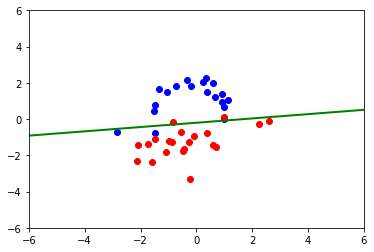

In [14]:
# вывод графика линейного классификатора
plot_boundary(pos_examples,neg_examples,wts)

## Проверяем на тестовой выборке

**[numpy.c_[args]](https://numpy.org/doc/stable/reference/generated/numpy.c_.html)** - преобразует срез в столбец, а последовательности соединяет вдоль второй оси

**[numpy.ones(args)](https://numpy.org/doc/stable/reference/generated/numpy.ones.html)** - возвращает новый массив указанной формы и типа, заполненный единицами

In [15]:
# функция получения точности работы персептрона на тестовой выборке
# weights - веса мадели нейронной сети персептрона
# test_x - тестовая выборка признаков объектов
# test_labels - текстовая выборка ответов объектов
def accuracy_on_test(weights, test_x, test_labels):
    # получение результата работы персептрона на тестовых данных
    y_pred = np.dot(np.c_[test_x,np.ones(len(test_x))],weights)
    
    # получение доли соответствия знака объектов при сравнении результата работы персептрона и тестовой выборки
    clf_accuracy = (y_pred.reshape(test_labels.shape)*test_labels>=0).sum()/float(len(test_labels))
    
    # выозврашение точности
    return clf_accuracy

clf_accuracy = accuracy_on_test(wts, test_x, test_labels)
print("Точность классификации моделью персептрона на тестовой выборке: {0:0.2f}".format(clf_accuracy))

Точность классификации моделью персептрона на тестовой выборке: 1.00


## Посмотрим, как меняется точность обучения

In [16]:
# функция записи в буфер весов и усредненной доли правильных ответов
# positive_examples - выборка "позитивных" объектов
# negative_examples - выборка "негативных" объектов
# num_iterations - количество итераций
def train_graph(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims,1)) # инициализируем веса
    
    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    report_frequency = 15;
    snapshots = []
    
    for i in range(num_iterations):
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)   
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)
            
        if i % report_frequency == 0:             
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            
            # запись в буфер весов и усредненной доли правильных ответов
            snapshots.append((np.copy(weights),(pos_correct+neg_correct)/2.0))
    
    # возвращение массива весов и усредненных долей правильных ответов
    return np.array(snapshots, dtype=object)

In [17]:
# запись в массив весов и усредненных долей правильных ответов
snapshots = train_graph(pos_examples,neg_examples)

In [18]:
# функции отображения графиков на каждом шаге
def plotit(pos_examples,neg_examples,snapshots,step):
    fig = plt.figure(figsize=(10,4))
    fig.add_subplot(1, 2, 1)
    plot_boundary(pos_examples, neg_examples, snapshots[step][0])
    fig.add_subplot(1, 2, 2)
    plt.plot(np.arange(len(snapshots[:,1])), snapshots[:,1])
    plt.ylabel('Accuracy')
    plt.xlabel('Iteration')
    plt.plot(step, snapshots[step,1], "bo")
    plt.show()
def pl1(step): plotit(pos_examples,neg_examples,snapshots,step)

In [19]:
# пошаговая иллюсраниця изменения весов и линии разделения классов
interact(pl1, step=widgets.IntSlider(value=0, min=0, max=len(snapshots)-1))

interactive(children=(IntSlider(value=0, description='step', max=6), Output()), _dom_classes=('widget-interact…

<function __main__.pl1(step)>

## Ограниченность персептрона

Типичный пример нерешаемой задачи - **исключающее или** (XOR problem)

|   | 0 | 1 |
|---|---|---|
| 0 | 0 | 1 | 
| 1 | 1 | 0 |

In [20]:
pos_examples_xor = np.array([[1,0,1],[0,1,1]])
neg_examples_xor = np.array([[1,1,1],[0,0,1]])

snapshots_xor = train_graph(pos_examples_xor,neg_examples_xor,1000)
def pl2(step): plotit(pos_examples_xor,neg_examples_xor,snapshots_xor,step)

In [21]:
interact(pl2, step=widgets.IntSlider(value=0, min=0, max=len(snapshots)-1))

interactive(children=(IntSlider(value=0, description='step', max=6), Output()), _dom_classes=('widget-interact…

<function __main__.pl2(step)>

## Сложный пример - MNIST

Modified National Institute of Standards and Technology

https://www.kaggle.com/c/digit-recognizer

  * Рукописные цифры, собранные с сотрудников института стандартов и учащихся, около 250 человек
  * 60000 обучающая выборка, 10000 тестовая выборка, собранная от разных групп
  * Изображения в градациях серого, 28x28

In [22]:
# !pip install rm
# !pip install wget
# !pip install gzip-reader

In [23]:
# не заработало!
# !rm *.pkl
# !wget https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz
# !gzip -d mnist.pkl.gz

In [24]:
with open('../Data/MNIST/mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)

[  0   0 188 255  94   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 191 250 253  93   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
1


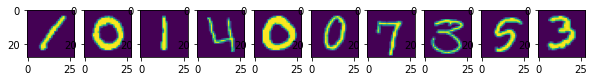

In [25]:
print(MNIST['Train']['Features'][0][130:180])
print(MNIST['Train']['Labels'][0])
features = MNIST['Train']['Features'].astype(np.float32) / 256.0
labels = MNIST['Train']['Labels']
fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    plt.imshow(features[i].reshape(28,28))
plt.show()

In [26]:
def set_mnist_pos_neg(positive_label, negative_label):
    positive_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
                          if j == positive_label]
    negative_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
                          if j == negative_label]

    positive_images = MNIST['Train']['Features'][positive_indices]
    negative_images = MNIST['Train']['Features'][negative_indices]

    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)
    pylab.imshow(positive_images[0].reshape(28,28), cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    ax = fig.add_subplot(1, 2, 2)
    pylab.imshow(negative_images[0].reshape(28,28), cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    pylab.show()
    
    return positive_images, negative_images

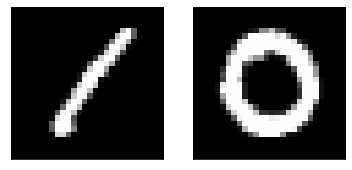

In [27]:
pos1,neg1 = set_mnist_pos_neg(1,0)

In [28]:
def plotit2(snapshots_mn,step):
    fig = pylab.figure(figsize=(10,4))
    ax = fig.add_subplot(1, 2, 1)
    pylab.imshow(snapshots_mn[step][0].reshape(28, 28), interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    pylab.colorbar()
    ax = fig.add_subplot(1, 2, 2)
    ax.set_ylim([0,1])
    pylab.plot(np.arange(len(snapshots_mn[:,1])), snapshots_mn[:,1])
    pylab.plot(step, snapshots_mn[step,1], "bo")
    pylab.show()
def pl3(step): plotit2(snapshots_mn,step)
def pl4(step): plotit2(snapshots_mn2,step)    

In [29]:
snapshots_mn = train_graph(pos1,neg1,1000)    
interact(pl3, step=widgets.IntSlider(value=0, min=0, max=len(snapshots_mn) - 1))

interactive(children=(IntSlider(value=0, description='step', max=66), Output()), _dom_classes=('widget-interac…

<function __main__.pl3(step)>

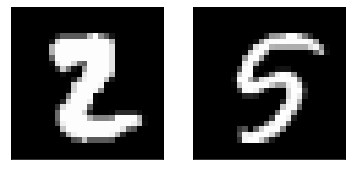

In [30]:
pos2,neg2 = set_mnist_pos_neg(2,5)

In [31]:
snapshots_mn2 = train_graph(pos2,neg2,1000)
interact(pl4, step=widgets.IntSlider(value=0, min=0, max=len(snapshots_mn2) - 1))

interactive(children=(IntSlider(value=0, description='step', max=66), Output()), _dom_classes=('widget-interac…

<function __main__.pl4(step)>

## В чем разница?

Почему-то 1 и 0 разделяются намного лучше, чем 2 и 5. 

Для понимания причины, используем [метод главных компонент](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82).

**Идея**: выделяем из множества входных фич (784 шт.) подмножество меньшей размерности, которое позволяет максимально репрезентативно разделить множества примеров.

In [32]:
from sklearn.decomposition import PCA

def pca_analysis(positive_label, negative_label):
    positive_images, negative_images = set_mnist_pos_neg(positive_label, negative_label)
    M = np.append(positive_images, negative_images, 0)

    mypca = PCA(n_components=2)
    mypca.fit(M)
    
    pos_points = mypca.transform(positive_images[:200])
    neg_points = mypca.transform(negative_images[:200])

    pylab.plot(pos_points[:,0], pos_points[:,1], 'bo')
    pylab.plot(neg_points[:,0], neg_points[:,1], 'ro')

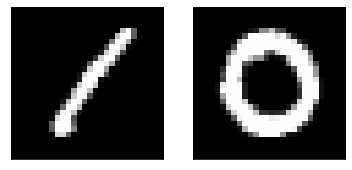

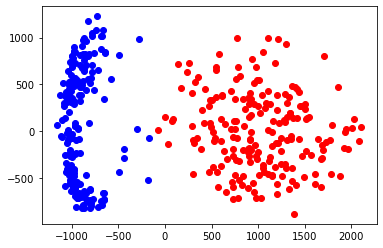

In [33]:
pca_analysis(1,0)

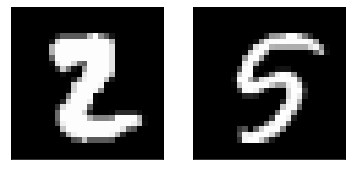

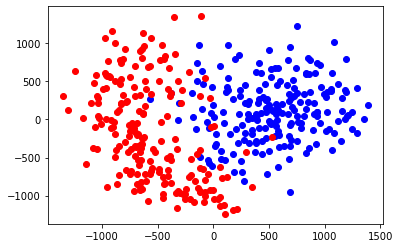

In [34]:
pca_analysis(2,5)

## Выводы

 * Мы научились создавать простейшую конфигурацию нейросети - однослойный персептрон
 * При этом такие сети уже могут решать весьма нетривиальные задачи
 * Тем не менее, однослойный персептрон по сути эквивалентен логистической регрессии, т.е. класс эффективно решаемых задач ограничен
 * В пространстве состояний однослойный персептрон может разделить два класса объектов гиперплоскостью